In [93]:
using CSV, DataFrames
using FileIO, Dates
using Graphs, MetaGraphs
using DataStructures
using Plots; gr()

include("../src/cubes.jl")

region_cube_split (generic function with 1 method)

In [94]:
region = "japan"

df = CSV.read("../data/$(region).csv", DataFrame);

In [95]:
df, df_cubes = region_cube_split(df,side=5);

In [96]:
G = Graphs.Graph(length(df_cubes.cubeIndex))
MG = MetaGraph(G)

{306609, 0} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [97]:
for i in 1:nv(MG)
    set_prop!(MG, i, :cubeIndex, df_cubes.cubeIndex[i])
    set_prop!(MG, i, :degree, 0)
    set_prop!(MG, i, :indegree, 0)
    set_prop!(MG, i, :outdegree, 0)
end

set_indexing_prop!(MG, :cubeIndex)

Set{Symbol} with 1 element:
  :cubeIndex

In [98]:
i=0
while i < length(df.cubeIndex)-1

    i+=1
    current_node = MG[df.cubeIndex[i],:cubeIndex]
    target_node = MG[df.cubeIndex[i+1],:cubeIndex]

    add_edge!(MG, current_node, target_node)
    
    set_prop!(MG, current_node, :degree, get_prop(MG,current_node,:degree)+1)
    set_prop!(MG, target_node, :degree, get_prop(MG,target_node,:degree)+1)

    set_prop!(MG, current_node, :outdegree, get_prop(MG,current_node,:outdegree)+1)
    set_prop!(MG, target_node, :indegree, get_prop(MG,target_node,:indegree)+1)

end

In [99]:
degrees=[]
indegrees=[]
outdegrees=[]
for i in 1:nv(MG)
    push!(degrees, get_prop(MG, i, :degree))
    push!(indegrees, get_prop(MG, i, :indegree))
    push!(outdegrees, get_prop(MG, i, :outdegree))
end

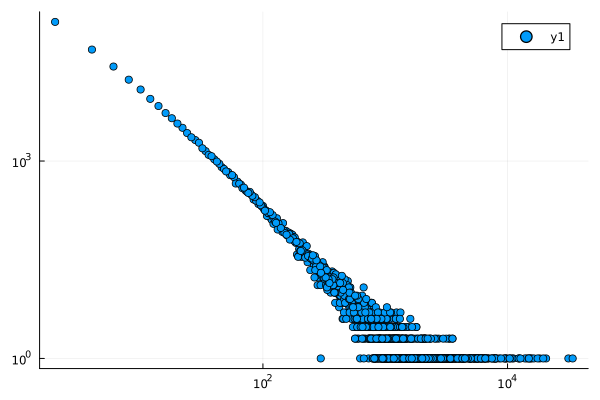

In [100]:
d = counter(degrees)
Plots.scatter(collect(keys(d)),collect(values(d)),xscale=:log10,yscale=:log10)

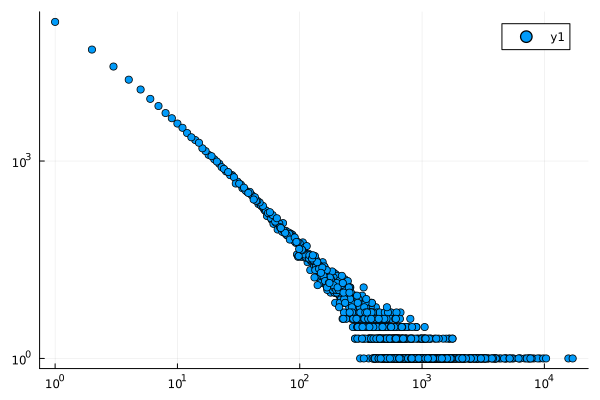

In [101]:
ind = counter(indegrees)
Plots.scatter(collect(keys(ind)),collect(values(ind)),xscale=:log10,yscale=:log10)

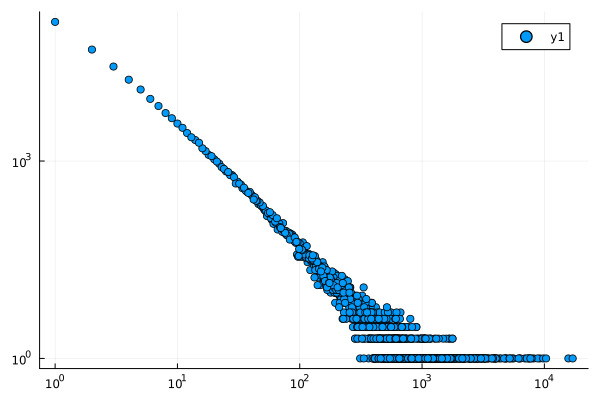

In [102]:
outd = counter(outdegrees)
Plots.scatter(collect(keys(outd)),collect(values(outd)),xscale=:log10,yscale=:log10)

In [103]:
using PyCall

In [104]:
@pyimport powerlaw as powlaw

In [110]:
fit = powlaw.Fit(degrees);
fig1 = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax=fig1)
fit.lognormal.plot_ccdf(ax=fig1)

Calculating best minimal value for power law fit


PyObject <AxesSubplot: >

In [111]:
fit.alpha

2.0740286851454615

In [112]:
fit.xmin

62.0

In [113]:
x_ccdf, y_ccdf  = fit.ccdf()

([62.0, 64.0, 66.0, 68.0, 70.0, 72.0, 74.0, 76.0, 78.0, 80.0  …  14986.0, 15384.0, 15734.0, 16420.0, 17616.0, 18356.0, 19574.0, 20654.0, 31440.0, 34072.0], [1.0, 0.9689278179144556, 0.9399654753532383, 0.911898216226584, 0.8871555527140208, 0.8619653474841762, 0.8390767853717793, 0.8172111757560259, 0.7963045841058756, 0.7745668435522025  …  0.0006393453104021063, 0.0005754107793619623, 0.0005114762483217072, 0.0004475417172814522, 0.0003836071862413082, 0.00031967265520105315, 0.00025573812416090913, 0.0001918035931206541, 0.00012786906208039905, 6.393453104025504e-5])

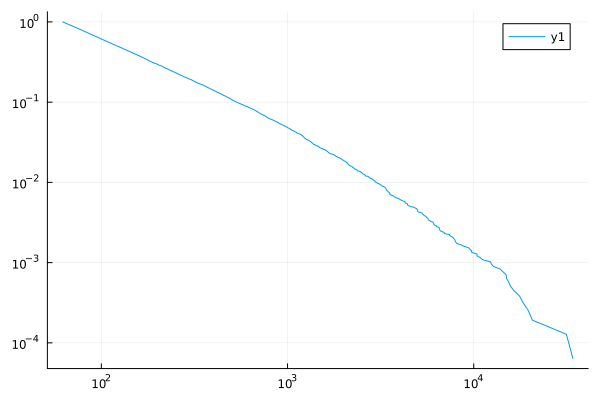

In [114]:
Plots.plot(x_ccdf, y_ccdf, xscale=:log10, yscale=:log10)

In [115]:
x_pdf, y_pdf  = fit.pdf()

([62.0, 78.0, 98.0, 124.0, 157.0, 199.0, 251.0, 318.0, 402.0, 507.0  …  4159.0, 5254.0, 6637.0, 8385.0, 10592.0, 13380.0, 16902.0, 21351.0, 26972.0, 34072.0], [0.012730963493382775, 0.008493702448692539, 0.005193451136805142, 0.0033304078441857357, 0.002029160235157294, 0.001246723355284189, 0.0007633973855548039, 0.00047874785743208477, 0.00032515275786166393, 0.00017176441174983088  …  3.3921435153977875e-6, 1.576467888662831e-6, 1.2481795647764283e-6, 4.3890982407470127e-7, 2.3175181165460742e-7, 1.1466020631315426e-7, 1.2707033426504932e-7, 5.748215872350175e-8, 0.0, 1.800972705358164e-8])

In [116]:
x=[]
for i=1:length(x_pdf)-1
    push!(x,(x_pdf[i]+x_pdf[i+1])/2)
end

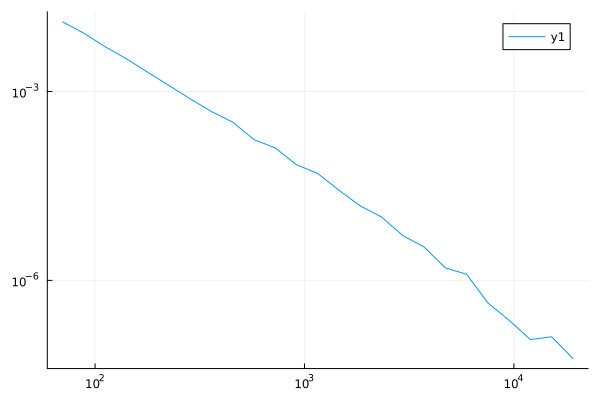

In [121]:
Plots.plot(x[1:end-2], y_pdf[1:end-2],xscale=:log10, yscale=:log10)

In [153]:
using PyCall, PyPlot
pyplot()

Plots.PyPlotBackend()

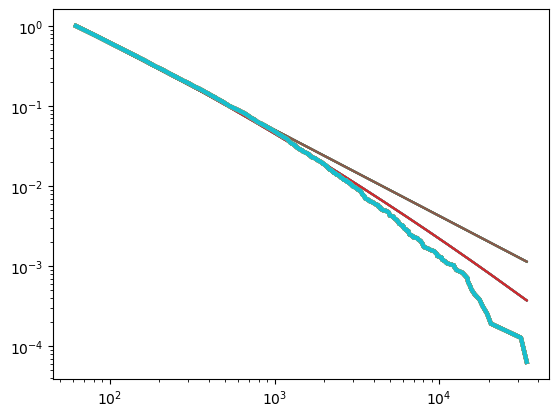

Calculating best minimal value for power law fit


In [165]:
fit = powlaw.Fit(degrees);
fig2 = fit.plot_ccdf(linewidth=3)
# fit.power_law.plot_ccdf(ax=fig1)
# fit.lognormal.plot_ccdf(ax=fig1)
fig2 = gcf()
display(fig2)

In [166]:
plt.show()

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


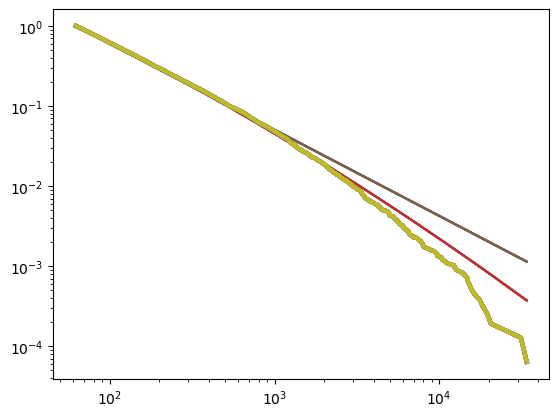

In [164]:

display(gcf())

In [155]:
display(fig1)

PyObject <AxesSubplot: >

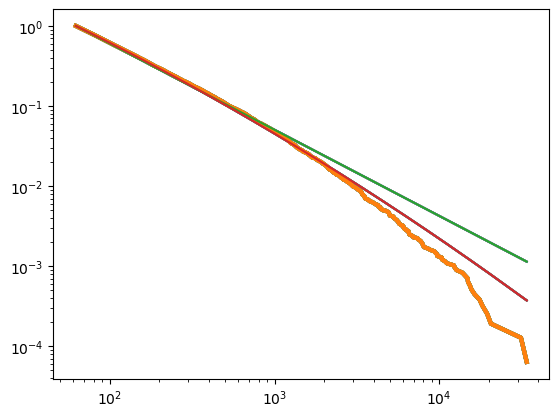

In [157]:
display(gcf())

In [139]:
gcf()

UndefVarError: UndefVarError: gcf not defined

In [137]:
Plots.prepare_output(fig1)

MethodError: MethodError: no method matching prepare_output(::PyObject)
Closest candidates are:
  prepare_output(!Matched::Plots.Plot) at C:\Users\gabipana\.julia\packages\Plots\nuwp4\src\plot.jl:231

In [130]:
Plots.prepare_output(fig1)

MethodError: MethodError: no method matching prepare_output(::PyObject)
Closest candidates are:
  prepare_output(!Matched::Plots.Plot) at C:\Users\gabipana\.julia\packages\Plots\nuwp4\src\plot.jl:231

In [ ]:
# i=0
# while i < length(vrancea.cubeIndex)-1

#     i+=1
#     current_node = MG[vrancea.cubeIndex[i],:cubeIndex]
#     target_node = MG[vrancea.cubeIndex[i+1],:cubeIndex]
    
    
#     if edgeWeight == false
#         add_edge!(MG,current_node,target_node)
#     else
#         if has_edge(MG, current_node, target_node)
#             set_prop!(MG,current_node,target_node,
#                     :weight, get_prop(MG,Edge(current_node,target_node),:weight)+1)
#             continue

#         else
#             add_edge!(MG,current_node,target_node,:weight,1)
#         end
#     end

# end

In [219]:
MG

{1727, 7612} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [234]:
G = Graph(MG)

{1727, 7612} undirected simple Int64 graph

In [235]:
for i in 1:nv(MG)
    set_prop!(MG, i, :xLatitude, vrancea_cubes.xLatitude[i])
    set_prop!(MG, i, :yLongitude, vrancea_cubes.yLongitude[i])
    set_prop!(MG, i, :zDepth, vrancea_cubes.zDepth[i])
end

In [237]:
props(MG,2)

Dict{Symbol, Any} with 4 entries:
  :zDepth     => 22
  :cubeIndex  => "6183"
  :xLatitude  => 10
  :yLongitude => 8

In [258]:
using GraphIO, EzXML

In [262]:
savegraph("./vrancea_5km.graphml", MG, GraphMLFormat())

1

In [248]:
savegraph("./vrancea_5km.txt",MG, EdgeListFormat())

1